In [1]:
# Install necessary libraries
!pip install seaborn matplotlib pandas

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd

data = pd.read_csv("Train.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
print(" Dataset after cleaning:\n")
print(data.info())
print("\nMissing values per column:\n", data.isnull().sum())
data.head()

 Dataset after cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None

Missing values per column:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Check and remove duplicates
print("Number of duplicate rows before:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(" Number of duplicate rows after:", data.duplicated().sum())

Number of duplicate rows before: 0
 Number of duplicate rows after: 0


In [5]:
# Handle outliers using IQR capping
import numpy as np
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()


for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower, lower,
                       np.where(data[col] > upper, upper, data[col]))
print(" Outliers capped using IQR method")

 Outliers capped using IQR method


In [6]:
# Standardize categorical values
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    data[col] = data[col].str.strip().str.lower()

print(" Standardized categorical column values")
print({col: data[col].unique().tolist() for col in cat_cols})

 Standardized categorical column values
{'Warehouse_block': ['d', 'f', 'a', 'b', 'c'], 'Mode_of_Shipment': ['flight', 'ship', 'road'], 'Product_importance': ['low', 'medium', 'high'], 'Gender': ['f', 'm']}


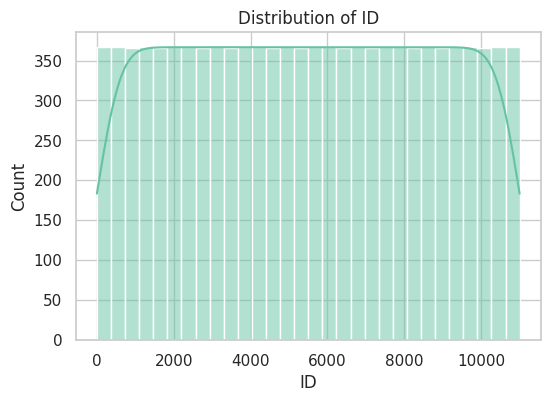

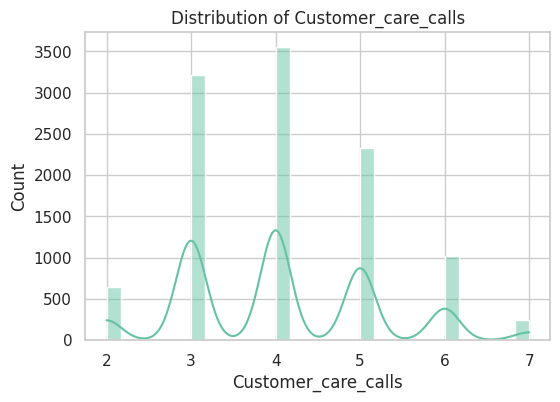

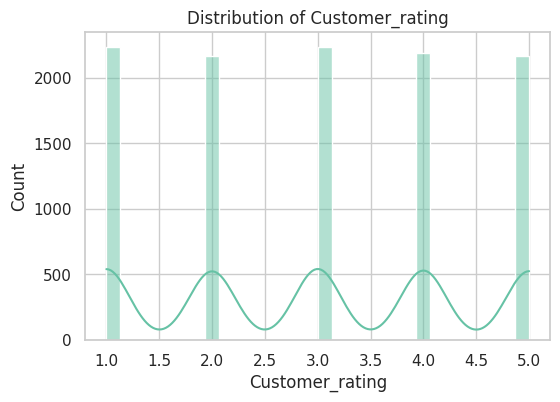

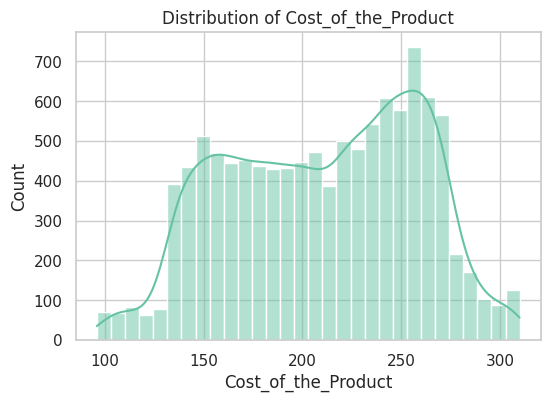

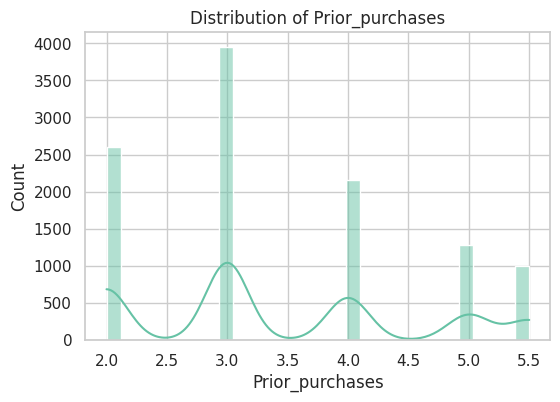

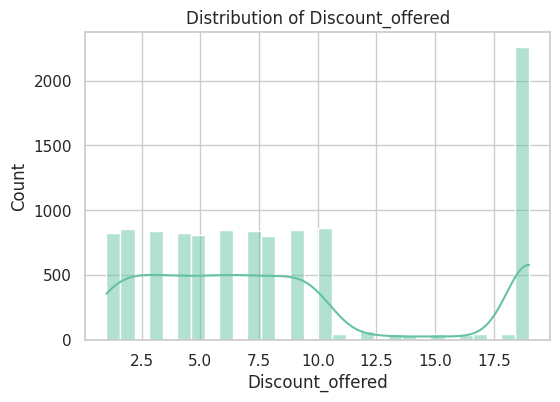

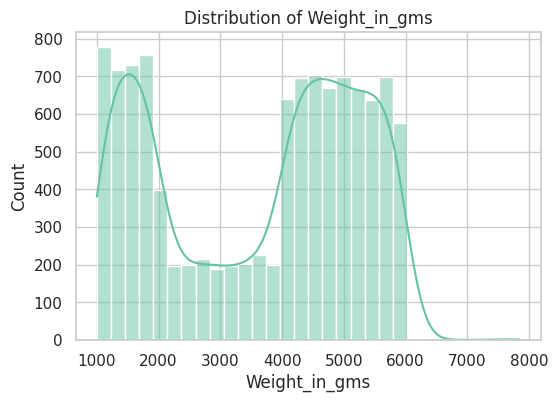

In [7]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("Reached.on.Time_Y.N")  # remove target from analysis

sns.set(style="whitegrid", palette="Set2")

# Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

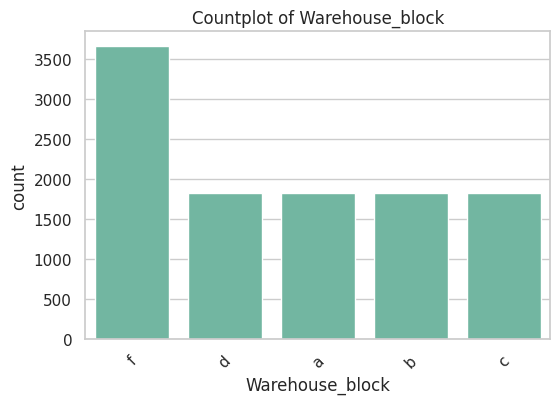

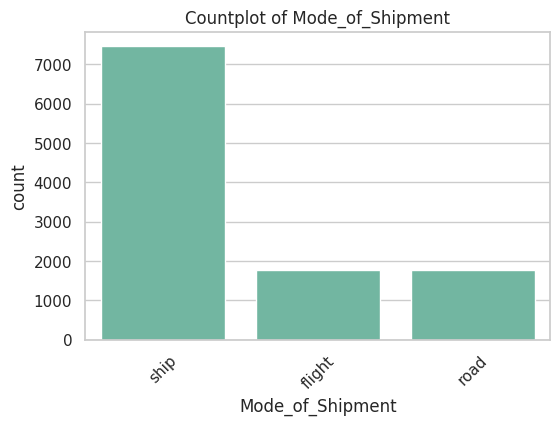

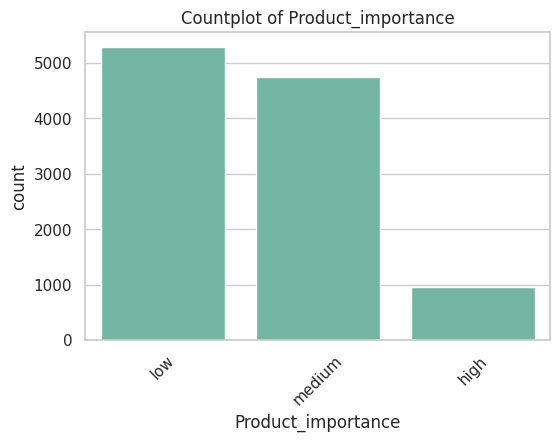

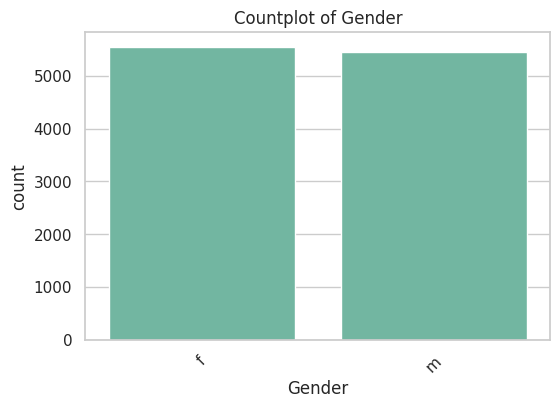

In [8]:
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

# Countplots
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

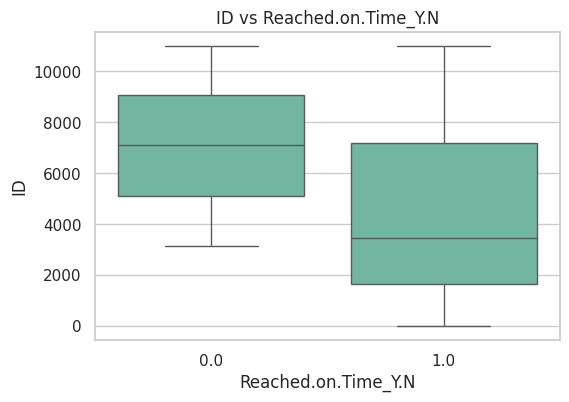

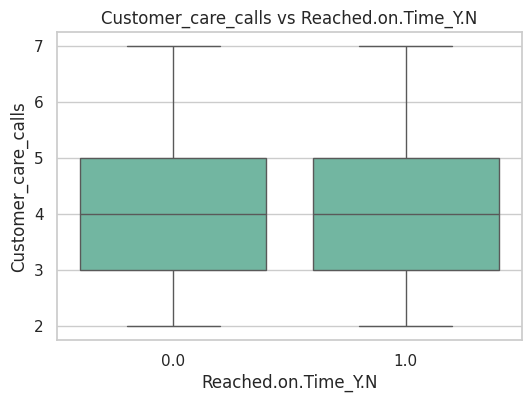

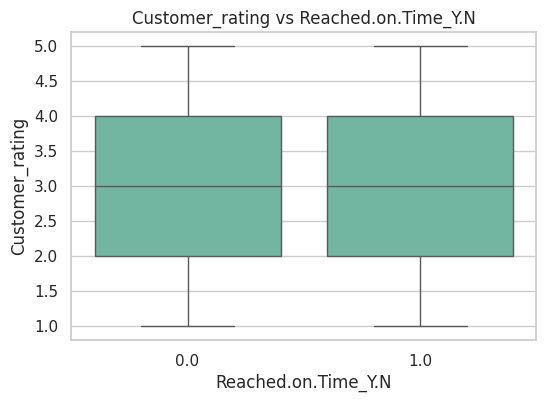

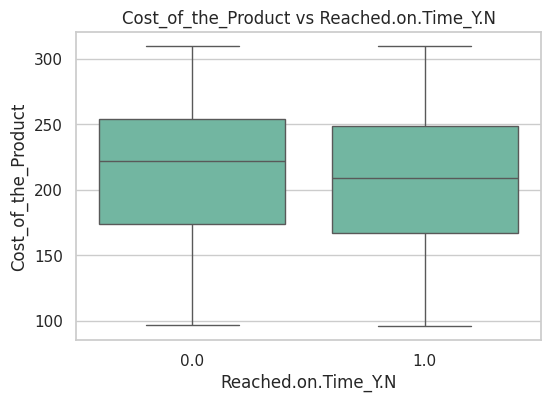

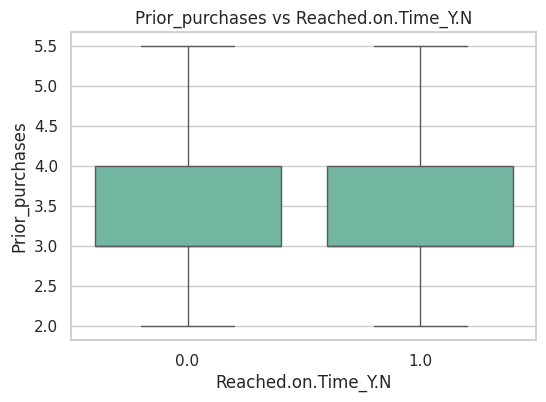

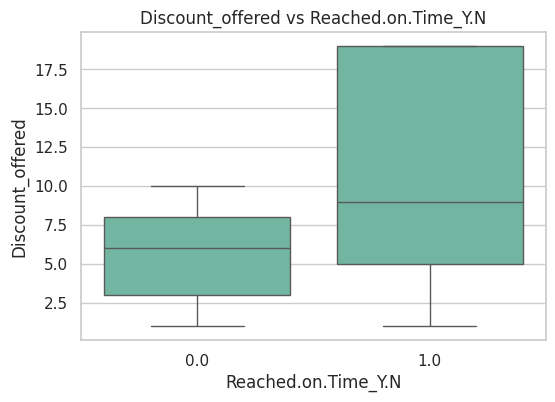

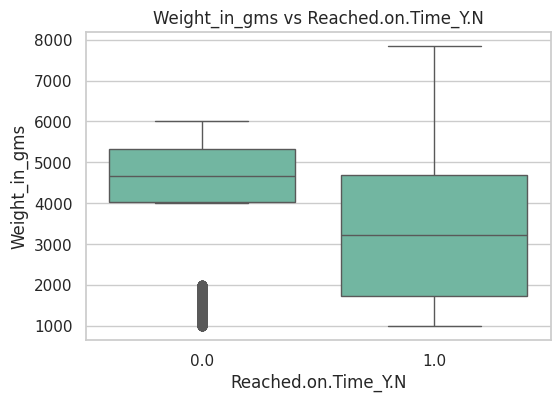

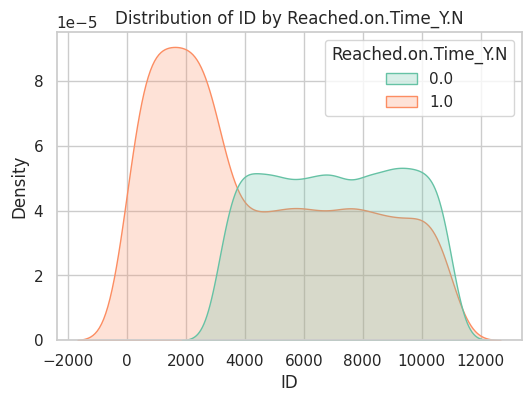

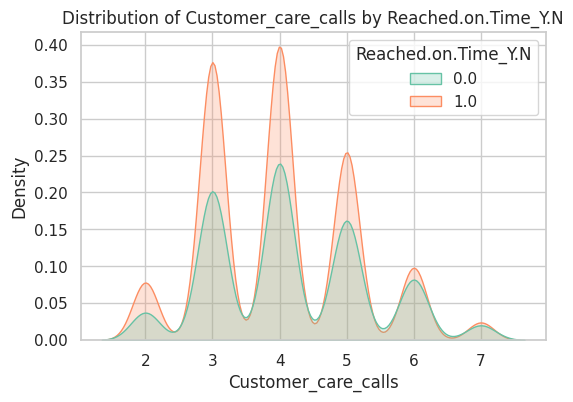

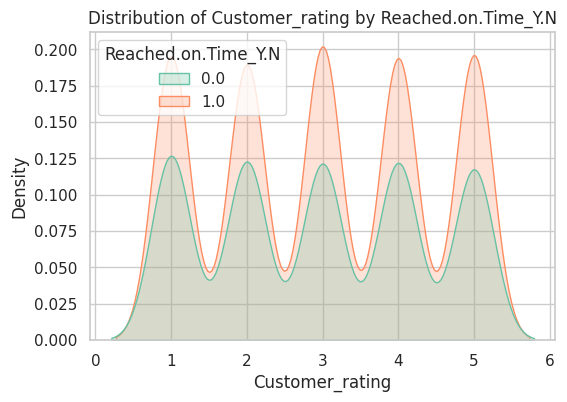

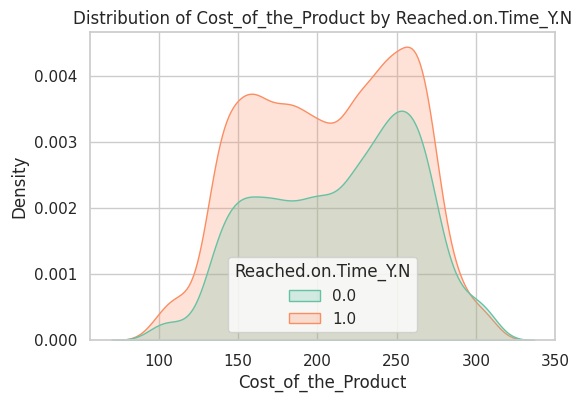

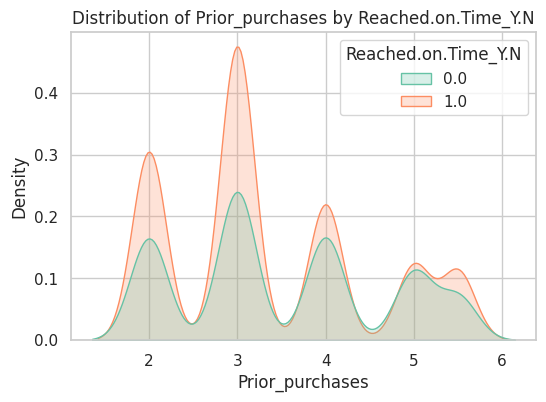

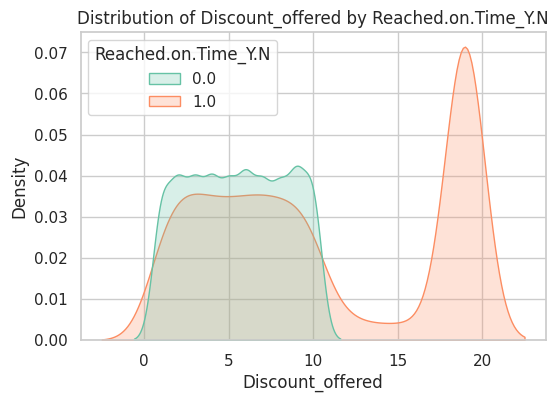

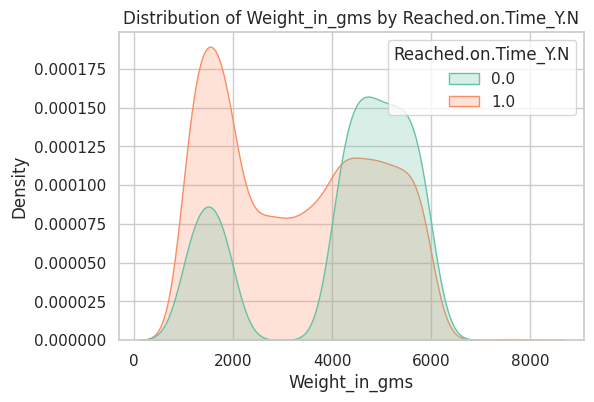

In [9]:
target = "Reached.on.Time_Y.N"

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f"{col} vs {target}")
    plt.show()

# KDE plots split by target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue=target, fill=True)
    plt.title(f"Distribution of {col} by {target}")
    plt.show()

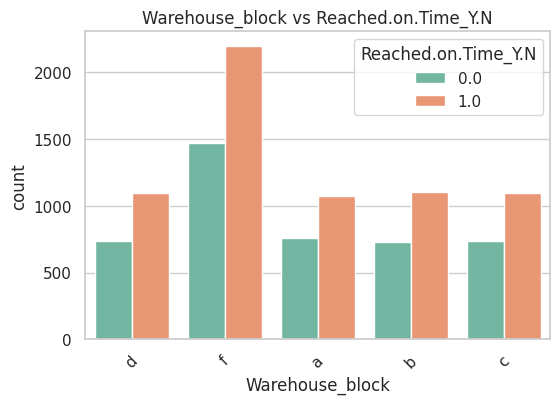

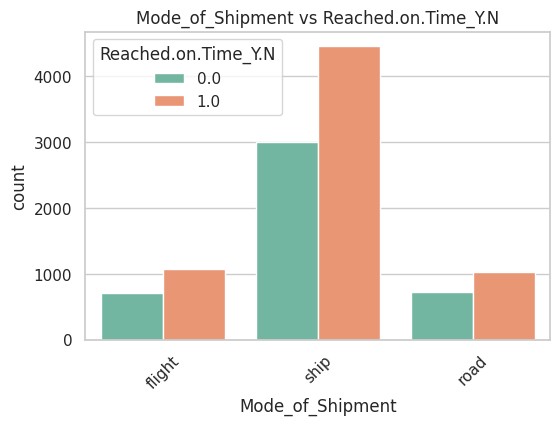

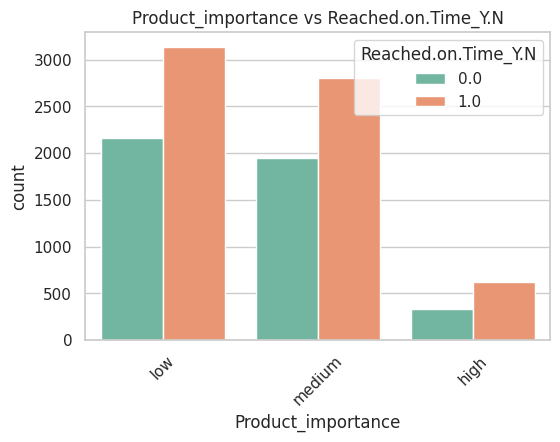

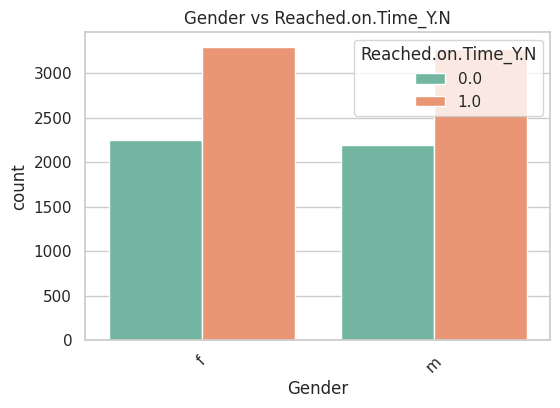

In [10]:
# Countplots with hue = target
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

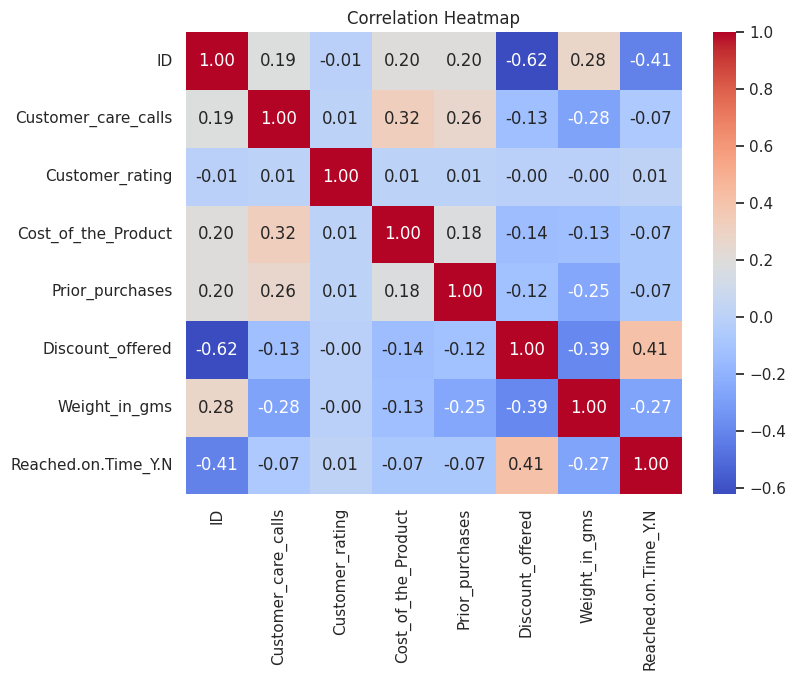

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols+[target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

 Class distribution:
Reached.on.Time_Y.N
1.0    6563
0.0    4436
Name: count, dtype: int64

 Class distribution (in %):
Reached.on.Time_Y.N
1.0    59.67
0.0    40.33
Name: proportion, dtype: float64


/tmp/ipython-input-2250780194.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette="Set2")


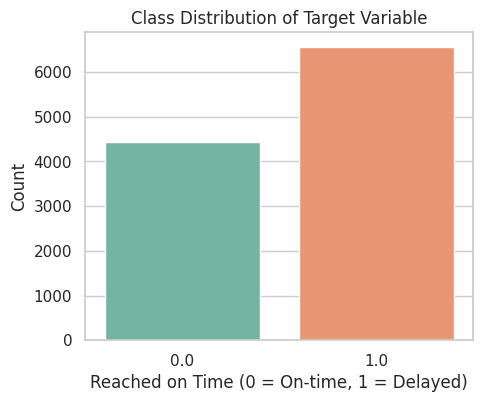

In [12]:
# Examine target variable balance
target = "Reached.on.Time_Y.N"

# Basic count
print(" Class distribution:")
print(data[target].value_counts())
print("\n Class distribution (in %):")
print(round(data[target].value_counts(normalize=True) * 100, 2))

# Visualize the imbalance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=target, data=data, palette="Set2")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Reached on Time (0 = On-time, 1 = Delayed)")
plt.ylabel("Count")
plt.show()

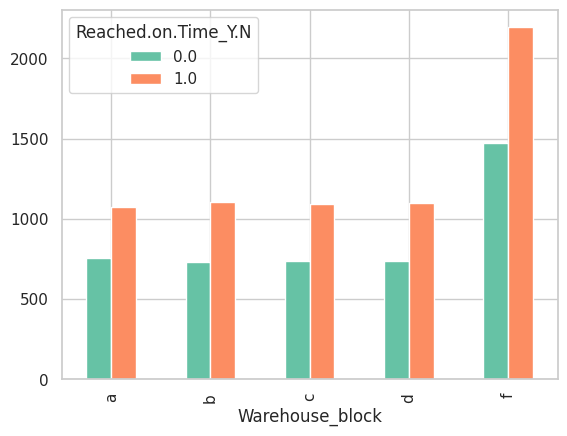

In [13]:
r = pd.crosstab(data['Warehouse_block'],data['Reached.on.Time_Y.N'])
r.plot(kind='bar')
plt.show()

In [14]:
# Copy dataset
encode_data = data.copy()

# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
le = LabelEncoder()

# Label Encode
encode_data['Product_importance'] = le.fit_transform(encode_data['Product_importance'])
encode_data['Gender'] = le.fit_transform(encode_data['Gender'])

# One-Hot Encode nominal categorical columns
encode_data = pd.get_dummies(encode_data,
                             columns=['Warehouse_block', 'Mode_of_Shipment'],
                             drop_first=True)

# Check
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_b,Warehouse_block_c,Warehouse_block_d,Warehouse_block_f,Mode_of_Shipment_road,Mode_of_Shipment_ship
0,1.0,4.0,2.0,177.0,3.0,1,0,19.0,1233.0,1.0,False,False,True,False,False,False
1,2.0,4.0,5.0,216.0,2.0,1,1,19.0,3088.0,1.0,False,False,False,True,False,False
2,3.0,2.0,2.0,183.0,4.0,1,1,19.0,3374.0,1.0,False,False,False,False,False,False
3,4.0,3.0,3.0,176.0,4.0,2,1,10.0,1177.0,1.0,True,False,False,False,False,False
4,5.0,2.0,2.0,184.0,3.0,2,0,19.0,2484.0,1.0,False,True,False,False,False,False


In [15]:
encode_data[['Product_importance', 'Gender'] +
            [col for col in encode_data.columns if 'Warehouse_block' in col or 'Mode_of_Shipment' in col]].head()
# Convert all boolean columns to 0/1
encode_data = encode_data.astype(int)
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_b,Warehouse_block_c,Warehouse_block_d,Warehouse_block_f,Mode_of_Shipment_road,Mode_of_Shipment_ship
0,1,4,2,177,3,1,0,19,1233,1,0,0,1,0,0,0
1,2,4,5,216,2,1,1,19,3088,1,0,0,0,1,0,0
2,3,2,2,183,4,1,1,19,3374,1,0,0,0,0,0,0
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0
4,5,2,2,184,3,2,0,19,2484,1,0,1,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
# Columns to normalize
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Apply to numerical columns
std_scaled_data = encode_data.copy()
std_scaled_data[num_cols] = std_scaler.fit_transform(encode_data[num_cols])

# Check results
print(std_scaled_data[num_cols].describe())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         1.099900e+04     1.099900e+04         1.099900e+04   
mean          2.325624e-16    -5.975562e-17        -1.343694e-16   
std           1.000045e+00     1.000045e+00         1.000045e+00   
min          -1.799887e+00    -1.408199e+00        -2.376077e+00   
25%          -9.237994e-01    -7.007551e-01        -8.571765e-01   
50%          -4.771132e-02     6.689172e-03         7.913188e-02   
75%           8.283768e-01     7.141334e-01         8.489855e-01   
max           2.580553e+00     1.421578e+00         2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     1.099900e+04      1.099900e+04   1.099900e+04  
mean      4.134443e-17      4.134443e-17  -1.188652e-16  
std       1.000045e+00      1.000045e+00   1.000045e+00  
min      -1.298133e+00     -1.245403e+00  -1.610109e+00  
25%      -3.547457e-01     -7.532116e-01  -1.097360e+00  
50%      -3.547457e-01     -2.610197e-0

In [17]:
encode_data['Cost_to_Weight_ratio'] = encode_data['Cost_of_the_Product'] / encode_data['Weight_in_gms']

#Handling infinity and NaN values
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values  with the median of valid ratios

In [18]:
print("Any NaN values left?", encode_data.isnull().sum().sum())
print("\nCost_to_Weight_ratio summary:\n", encode_data['Cost_to_Weight_ratio'].describe())

# Preview final dataset
encode_data.head()

Any NaN values left? 0

Cost_to_Weight_ratio summary:
 count    10999.000000
mean         0.079229
std          0.055913
min          0.016482
25%          0.039771
50%          0.054916
75%          0.103455
max          0.309073
Name: Cost_to_Weight_ratio, dtype: float64


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_b,Warehouse_block_c,Warehouse_block_d,Warehouse_block_f,Mode_of_Shipment_road,Mode_of_Shipment_ship,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,19,1233,1,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,19,3088,1,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,19,3374,1,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,19,2484,1,0,1,0,0,0,0,0.074074


In [19]:
print("Target Variable (Reached.on.Time_Y.N):")
print(data['Reached.on.Time_Y.N'].value_counts())
print("\nNormalized Value Counts (Proportion):")
print(data['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N
1.0    6563
0.0    4436
Name: count, dtype: int64

Normalized Value Counts (Proportion):
Reached.on.Time_Y.N
1.0    0.596691
0.0    0.403309
Name: proportion, dtype: float64


In [20]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())
    print("\nNormalized:")
    print(data[col].value_counts(normalize=True))


Column: Warehouse_block
Warehouse_block
f    3666
d    1834
a    1833
b    1833
c    1833
Name: count, dtype: int64

Normalized:
Warehouse_block
f    0.333303
d    0.166742
a    0.166652
b    0.166652
c    0.166652
Name: proportion, dtype: float64

Column: Mode_of_Shipment
Mode_of_Shipment
ship      7462
flight    1777
road      1760
Name: count, dtype: int64

Normalized:
Mode_of_Shipment
ship      0.678425
flight    0.161560
road      0.160015
Name: proportion, dtype: float64

Column: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Normalized:
Product_importance
low       0.481589
medium    0.432221
high      0.086190
Name: proportion, dtype: float64

Column: Gender
Gender
f    5545
m    5454
Name: count, dtype: int64

Normalized:
Gender
f    0.504137
m    0.495863
Name: proportion, dtype: float64


In [21]:
encode_data.select_dtypes(include=['object']).columns
encode_data.dtypes

,0
ID,int64
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,int64
Gender,int64
Discount_offered,int64
Weight_in_gms,int64
Reached.on.Time_Y.N,int64


In [22]:
X = encode_data.drop('Reached.on.Time_Y.N', axis=1)
y = encode_data['Reached.on.Time_Y.N']

In [23]:
X

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_b,Warehouse_block_c,Warehouse_block_d,Warehouse_block_f,Mode_of_Shipment_road,Mode_of_Shipment_ship,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,19,1233,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,19,3088,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,19,3374,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,19,2484,0,1,0,0,0,0,0.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,2,0,1,1538,0,0,0,0,0,1,0.163849
10995,10996,4,1,232,5,2,0,6,1247,1,0,0,0,0,1,0.186047
10996,10997,5,4,242,5,1,0,4,1155,0,1,0,0,0,1,0.209524
10997,10998,5,2,223,5,2,1,2,1210,0,0,0,1,0,1,0.184298


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split training data into train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [25]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8799, 16)
Testing set shape: (2200, 16)


In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 5250, 1: 5250})


In [27]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC  # Support Vector Machine
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from lightgbm import LGBMClassifier # Import LightGBM
from catboost import CatBoostClassifier # Import CatBoost


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),  # L2 regularization (smaller C = stronger)

    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),

    "Naive Bayes": GaussianNB(),

    "KNN": KNeighborsClassifier(n_neighbors=9),  # more neighbors → smoother, less overfitting

    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=42),

    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5, use_label_encoder=False, eval_metric='logloss', random_state=42),

    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,num_leaves=20, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),

    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

results = []

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])

    # Cross-validation accuracy (10-fold)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    results.append({
        'Model': name,
        'Mean CV Accuracy': round(np.mean(cv_scores), 4),
        'Std Dev': round(np.std(cv_scores), 4)
    })

results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n Cross-validation results (Overfitting check):")
print(results_df)


 Cross-validation results (Overfitting check):
                 Model  Mean CV Accuracy  Std Dev
5                  SVM            0.6826   0.0120
1        Decision Tree            0.6817   0.0098
2        Random Forest            0.6809   0.0094
3          Naive Bayes            0.6739   0.0092
8             CatBoost            0.6642   0.0150
7             LightGBM            0.6596   0.0123
6              XGBoost            0.6550   0.0161
4                  KNN            0.6542   0.0119
0  Logistic Regression            0.6509   0.0096


In [30]:
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)
# Define models with anti-overfitting hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=RND),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=4, random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                                            min_samples_leaf=3, max_features='sqrt', random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=RND),
    "XGBoost": XGBClassifier(max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                             reg_lambda=1, n_estimators=200, random_state=RND, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(num_leaves=20, max_depth=6, subsample=0.8, reg_lambda=0.5,
                               learning_rate=0.05, n_estimators=200, random_state=RND),
    "CatBoost": CatBoostClassifier(depth=6, learning_rate=0.05, l2_leaf_reg=3, n_estimators=200,
                                   verbose=0, random_state=RND)
}

In [31]:
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:41:57] WARNING: /w

[LightGBM] [Info] Number of positive: 4725, number of negative: 3194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 7919, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596666 -> initscore=0.391594
[LightGBM] [Info] Start training from score 0.391594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [32]:
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
              Model  Mean CV Accuracy  Std Dev
                SVM          0.688373 0.010290
      Decision Tree          0.681100 0.006851
           CatBoost          0.675988 0.012795
      Random Forest          0.675647 0.009990
        Naive Bayes          0.675418 0.009363
            XGBoost          0.673827 0.010758
           LightGBM          0.667918 0.011236
Logistic Regression          0.655872 0.012026
                KNN          0.654509 0.013355


In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC  # Support Vector Machine
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from lightgbm import LGBMClassifier # Import LightGBM
from catboost import CatBoostClassifier # Import CatBoost


models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

In [34]:
!pip install catboost


Training and Evaluating: Logistic Regression
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       710
           1       0.73      0.69      0.71      1050

    accuracy                           0.66      1760
   macro avg       0.65      0.66      0.66      1760
weighted avg       0.67      0.66      0.67      1760



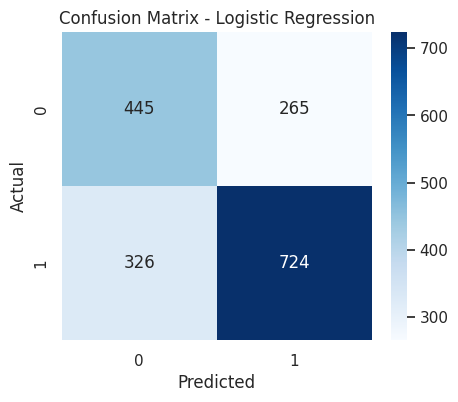

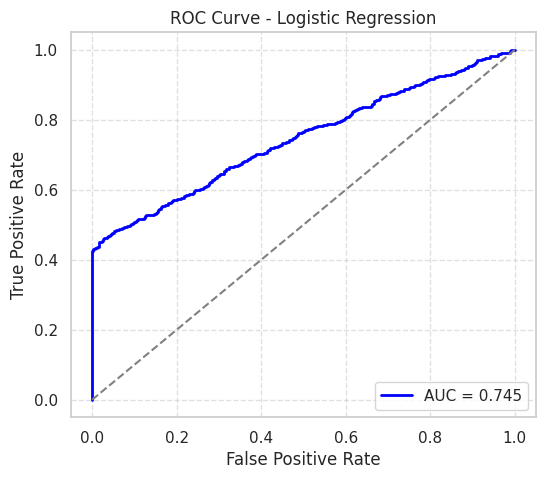


Training and Evaluating: Decision Tree
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.88      0.70       710
           1       0.88      0.58      0.70      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760



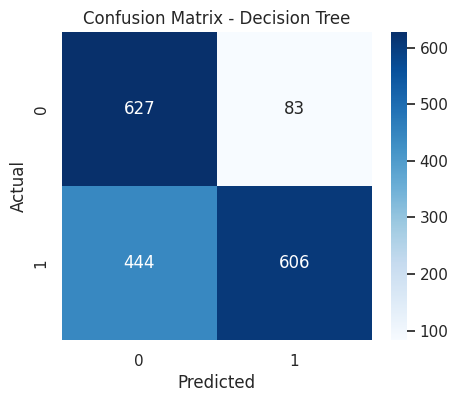

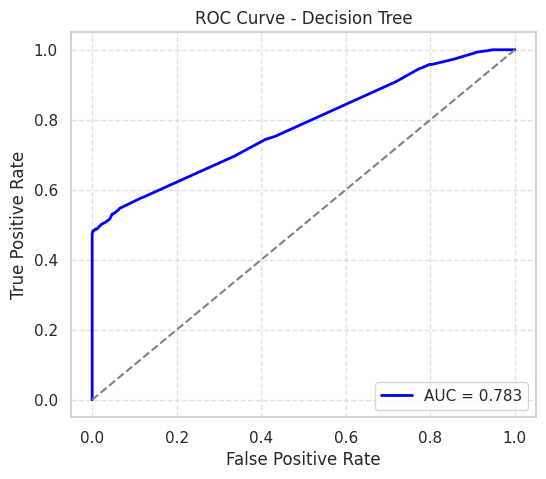


Training and Evaluating: Random Forest
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       710
           1       1.00      0.62      0.76      1050

    accuracy                           0.77      1760
   macro avg       0.82      0.81      0.77      1760
weighted avg       0.85      0.77      0.77      1760



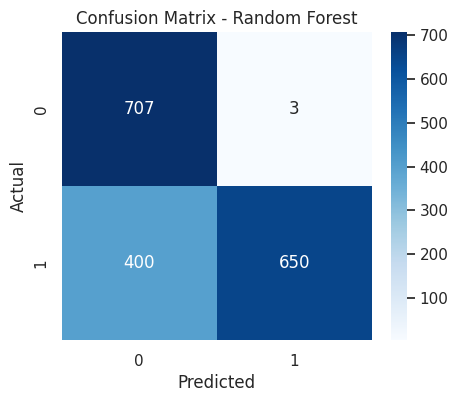

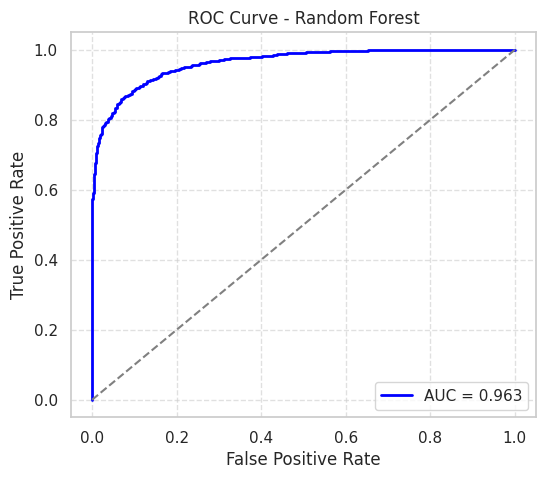


Training and Evaluating: Naive Bayes
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       710
           1       0.86      0.54      0.67      1050

    accuracy                           0.68      1760
   macro avg       0.71      0.71      0.67      1760
weighted avg       0.74      0.68      0.67      1760



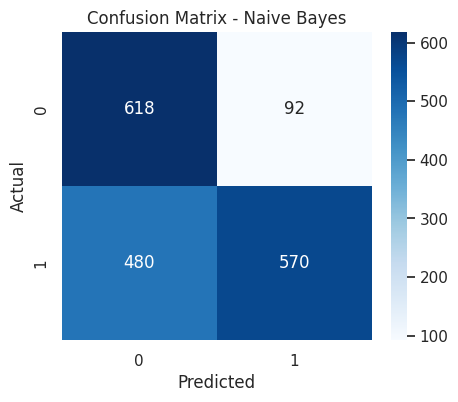

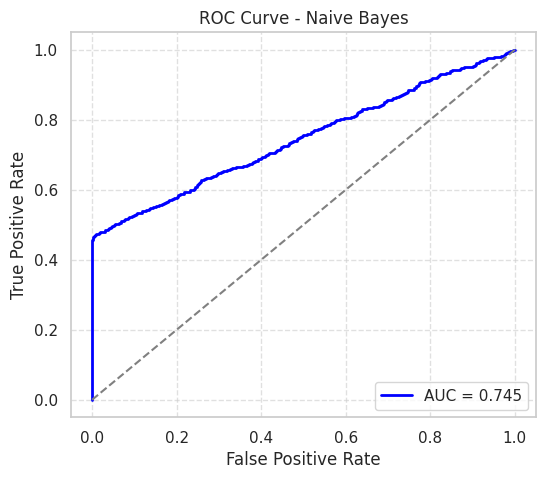


Training and Evaluating: KNN
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       710
           1       0.83      0.73      0.77      1050

    accuracy                           0.75      1760
   macro avg       0.74      0.75      0.74      1760
weighted avg       0.76      0.75      0.75      1760



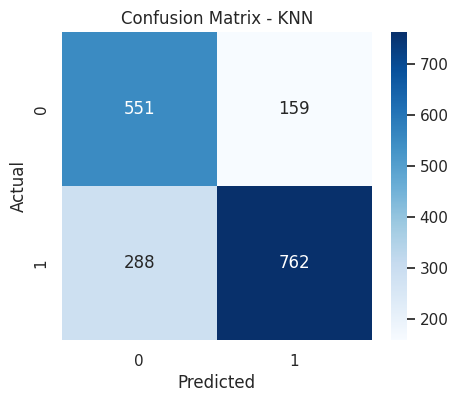

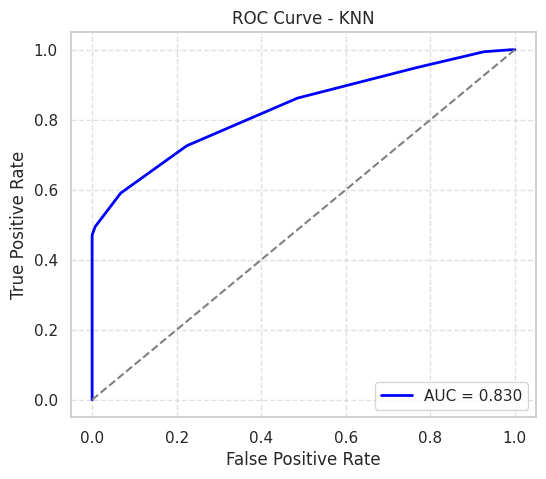


Training and Evaluating: SVM
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       710
           1       0.97      0.49      0.65      1050

    accuracy                           0.69      1760
   macro avg       0.77      0.73      0.68      1760
weighted avg       0.81      0.69      0.68      1760



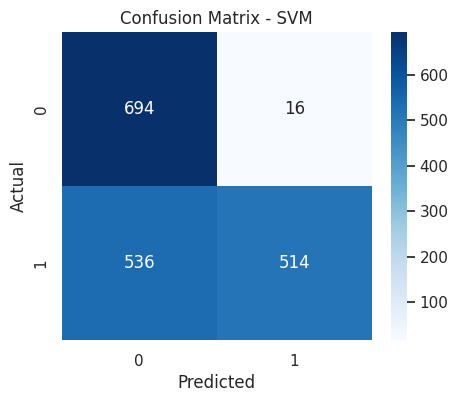

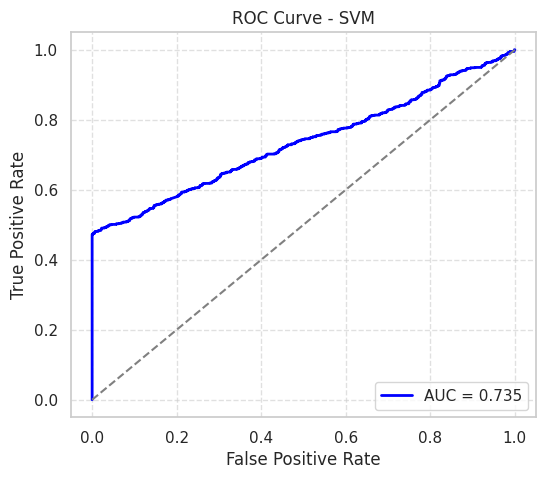


Training and Evaluating: XGBoost
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:43:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       710
           1       0.99      0.95      0.97      1050

    accuracy                           0.96      1760
   macro avg       0.96      0.97      0.96      1760
weighted avg       0.96      0.96      0.96      1760



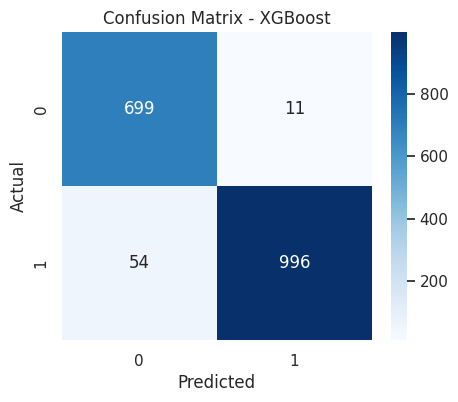

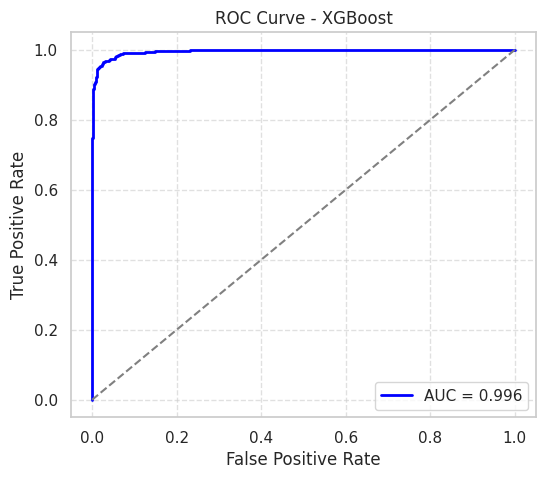


Training and Evaluating: LightGBM
----------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

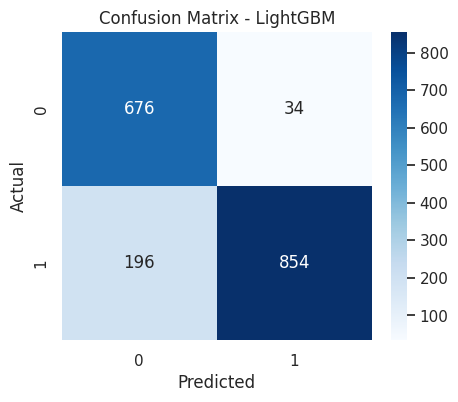

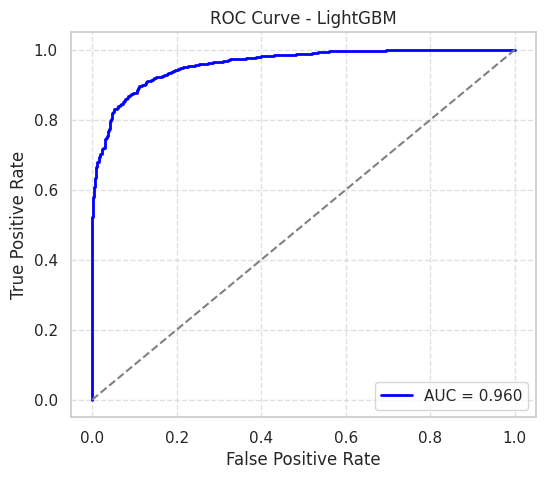


Training and Evaluating: CatBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       710
           1       0.97      0.78      0.87      1050

    accuracy                           0.86      1760
   macro avg       0.86      0.88      0.86      1760
weighted avg       0.88      0.86      0.86      1760



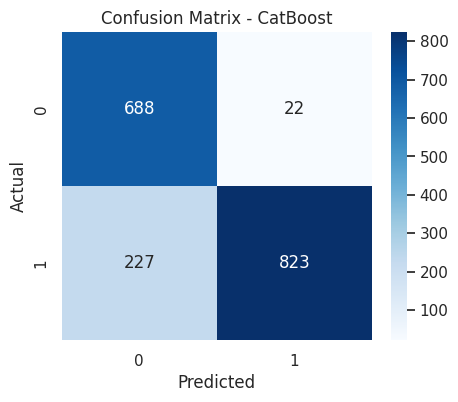

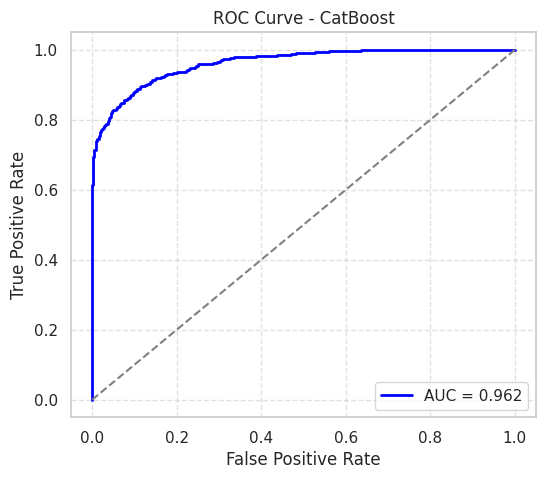

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)


    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))


    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [36]:
'''from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)


    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))


    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })'''

'from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport seaborn as sns\n\n\ncomparison = []\n\nfor name, model in models.items():\n    print(f"\nTraining and Evaluating: {name}")\n    print("-" * 70)\n\n    # Train model\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_val)\n    y_prob = model.predict_proba(X_val)[:, 1]\n\n    # Metrics\n    acc = accuracy_score(y_val, y_pred)\n    prec = precision_score(y_val, y_pred)\n    rec = recall_score(y_val, y_pred)\n    f1 = f1_score(y_val, y_pred)\n    roc_auc = roc_auc_score(y_val, y_prob)\n\n\n    print("\nClassification Report:")\n    print(classification_report(y_val, y_pred))\n\n\n    plt.figure(figsize=(5,4))\n    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt=\'d\', cmap=\'Blues\')\n    plt.title(f"Confusion Matrix - {name}")\n    plt.xlabel("Predicted

In [37]:
comparison_df = pd.DataFrame(comparison).sort_values(by="ROC-AUC", ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9631     0.9891  0.9486    0.9684   0.9956
2        Random Forest    0.7710     0.9954  0.6190    0.7634   0.9632
8             CatBoost    0.8585     0.9740  0.7838    0.8686   0.9625
7             LightGBM    0.8693     0.9617  0.8133    0.8813   0.9598
4                  KNN    0.7460     0.8274  0.7257    0.7732   0.8298
1        Decision Tree    0.7006     0.8795  0.5771    0.6970   0.7826
3          Naive Bayes    0.6750     0.8610  0.5429    0.6659   0.7454
0  Logistic Regression    0.6642     0.7321  0.6895    0.7102   0.7446
5                  SVM    0.6864     0.9698  0.4895    0.6506   0.7348


In [77]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Step 1: Detect categorical columns that still exist
cat_cols = [col for col in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'] if col in X_train.columns]

label_encoders = {}

#  Step 2: Encode existing categorical columns
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    if col in X_test.columns:
        X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

print(f"Encoded columns: {list(label_encoders.keys())}")

#  Step 3: Get the best trained model (ensure it’s already fitted)
best_model = models["XGBoost"]

#  Step 4: Save everything for deployment
joblib.dump(best_model, "best_xgboost_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

print(" Model, LabelEncoders, and feature columns saved successfully!")


Encoded columns: ['Product_importance', 'Gender']
 Model, LabelEncoders, and feature columns saved successfully!


In [78]:
import joblib

# Load your existing feature columns
feature_columns = joblib.load("feature_columns.pkl")

# Remove ID column if present
if "ID" in feature_columns:
    feature_columns.remove("ID")
    print(" 'ID' column removed from feature list.")
else:
    print("ℹ 'ID' column not found — already clean.")

# Save updated list
joblib.dump(feature_columns, "feature_columns.pkl")
print(" Updated feature_columns.pkl saved successfully.")


 'ID' column removed from feature list.
 Updated feature_columns.pkl saved successfully.


In [40]:
import joblib
model = joblib.load("best_xgboost_model.pkl")
print(model.get_booster().feature_names)


['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_b', 'Warehouse_block_c', 'Warehouse_block_d', 'Warehouse_block_f', 'Mode_of_Shipment_road', 'Mode_of_Shipment_ship', 'Cost_to_Weight_ratio']


In [79]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("/content/Train.csv")  # change path if needed

# Define categorical columns
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]

# Create dictionary of label encoders
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders and feature columns again
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(df.columns.tolist(), "feature_columns.pkl")

print(" Encoders and feature columns saved successfully!")
print(" Encoded columns:", list(label_encoders.keys()))


 Encoders and feature columns saved successfully!
 Encoded columns: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [80]:
import joblib

# Load the trained model
model = joblib.load("best_xgboost_model.pkl")

# Extract and save the feature names directly from the trained model
feature_columns = model.get_booster().feature_names
joblib.dump(feature_columns, "feature_columns.pkl")

print(" feature_columns.pkl updated successfully!")
print("Feature columns:", feature_columns)


 feature_columns.pkl updated successfully!
Feature columns: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_b', 'Warehouse_block_c', 'Warehouse_block_d', 'Warehouse_block_f', 'Mode_of_Shipment_road', 'Mode_of_Shipment_ship', 'Cost_to_Weight_ratio']


In [43]:
!pip install streamlit joblib xgboost pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.4 MB/s eta 0:00:00


In [71]:
# 1. Clean up any running ngrok or Streamlit sessions
!pkill streamlit
!pkill ngrok


In [72]:
!ls -l app.py


-rw-r--r-- 1 root root 3191 Nov  9 12:43 app.py


In [73]:
!streamlit run app.py &>/content/logs.txt &


In [74]:
!tail -n 10 /content/logs.txt





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.55.122:8501



In [48]:
!pip install pyngrok


In [76]:


from pyngrok import ngrok

#  Set your ngrok authtoken properly inside quotes
ngrok.set_auth_token("353izSXMaBp2rgRo0LjTBBENdOh_2BQGAs33QLBgwzibgyD39")

# Now create a tunnel to port 8501 (Streamlit)
public_url = ngrok.connect(8501)
print("🌐 Streamlit App is live at:", public_url)



🌐 Streamlit App is live at: NgrokTunnel: "https://contradictious-pleonic-aubrey.ngrok-free.dev" -> "http://localhost:8501"
